## 📌 1️⃣ Importação de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

pd.set_option('display.max_columns', None)

## 📌 2️⃣ Carregando os dados

In [2]:
spreadsheet_id = "1td91KoeSgXrUrCVOUkLmONG9Go3LVcXpcNEw_XrL2R0"

sheets = {
    "PEDE2022": "90992733",
    "PEDE2023": "555005642",
    "PEDE2024": "215885893"
}

def read_google_sheets(sheet_id):
  csv_url = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={sheet_id}"
  return pd.read_csv(csv_url, decimal=',')

### Dados de 2022

In [3]:
df_2022 = read_google_sheets(sheets["PEDE2022"])
df_2022.head()

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753.0,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469.0,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ágata,6.591,629.0,13,6,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,Ametista,Quartzo,5.951,731.0,15,7,4,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ametista,7.427,344.0,6,2,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [4]:
df_2022.shape

(860, 42)

In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     860 non-null    object 
 1   Fase                   860 non-null    int64  
 2   Turma                  860 non-null    object 
 3   Nome                   860 non-null    object 
 4   Ano nasc               860 non-null    int64  
 5   Idade 22               860 non-null    int64  
 6   Gênero                 860 non-null    object 
 7   Ano ingresso           860 non-null    int64  
 8   Instituição de ensino  860 non-null    object 
 9   Pedra 20               323 non-null    object 
 10  Pedra 21               462 non-null    object 
 11  Pedra 22               860 non-null    object 
 12  INDE 22                860 non-null    float64
 13  Cg                     860 non-null    float64
 14  Cf                     860 non-null    int64  
 15  Ct    

In [6]:
df_2022.describe()

,Fase,Ano nasc,Idade 22,Ano ingresso,INDE 22,Cg,Cf,Ct,Nº Av,IAA,IEG,IPS,IDA,Matem,Portug,Inglês,IPV,IAN,Defas
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,858.000000,858.000000,283.000000,860.000000,860.000000,860.000000
mean,2.098837,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,6.905000,6.092907,5.806876,6.320979,5.881272,7.253642,6.424419,-0.943023
std,1.788789,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,1.070707,2.046209,2.414215,2.080364,2.957315,1.093383,2.389609,0.845593
min,0.000000,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000,-5.000000
25%,1.000000,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,6.300000,4.800000,4.300000,5.200000,3.500000,6.722000,5.000000,-1.000000
50%,2.000000,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,7.500000,6.300000,6.000000,6.700000,6.300000,7.333000,5.000000,-1.000000
75%,3.000000,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,7.500000,7.600000,7.800000,7.800000,8.500000,7.917000,10.000000,0.000000
max,7.000000,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [7]:
for col in df_2022.columns:
    print(f"{col} NaN: {df_2022[col].isna().sum()}")
    print(f"{df_2022[col].value_counts()}")
    print()

RA NaN: 0
RA
RA-1      1
RA-566    1
RA-568    1
RA-569    1
RA-570    1
         ..
RA-290    1
RA-291    1
RA-292    1
RA-293    1
RA-860    1
Name: count, Length: 860, dtype: int64

Fase NaN: 0
Fase
1    192
0    190
2    155
3    148
4     76
5     60
7     21
6     18
Name: count, dtype: int64

Turma NaN: 0
Turma
A    107
B     78
L     76
F     70
K     62
D     49
M     47
G     40
U     38
J     38
P     33
N     32
C     29
H     25
E     23
Q     22
I     20
R     20
O     12
Y     10
Z      9
S      7
V      7
T      6
Name: count, dtype: int64

Nome NaN: 0
Nome
Aluno-1      1
Aluno-566    1
Aluno-568    1
Aluno-569    1
Aluno-570    1
            ..
Aluno-290    1
Aluno-291    1
Aluno-292    1
Aluno-293    1
Aluno-860    1
Name: count, Length: 860, dtype: int64

Ano nasc NaN: 0
Ano nasc
2012    116
2010    107
2011    102
2009    100
2013     96
2008     85
2007     63
2014     57
2006     52
2005     48
2015     14
2004     12
2003      5
2002      2
2001      1
Name: coun

### Checando cálculo de Atingiu_PV

In [8]:
media_ipv_22 = df_2022['IPV'].mean()
media_ipv_22

np.float64(7.253641860465116)

In [9]:
desvio_padrao_ipv_22 = df_2022['IPV'].std()
desvio_padrao_ipv_22

np.float64(1.0933825108925763)

In [10]:
IPV_M_D_22 = media_ipv_22 + desvio_padrao_ipv_22
IPV_M_D_22

np.float64(8.347024371357692)

In [11]:
df_2022['Atingiu PV 2'] = np.where(df_2022['IPV'] > IPV_M_D_22, 1, 0)

In [12]:
df_2022['Atingiu PV 2'].value_counts()

Atingiu PV 2
0    747
1    113
Name: count, dtype: int64

In [13]:
df_2022['Atingiu PV'].value_counts()

Atingiu PV
Não    747
Sim    113
Name: count, dtype: int64

### Dados de 2023

In [14]:
df_2023 = read_google_sheets(sheets["PEDE2023"])
df_2023.head()

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,"9,31095",Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,"8,13",8.4375,NaN,"9,6",9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,"8,2212",Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,"8,14",7.5000,NaN,"8,9",8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
2,RA-863,ALFA,"5,92975",Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,"3,14",5.9375,NaN,"6,3",7.0,5.5,NaN,NaN,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
3,RA-864,ALFA,"7,034",Ametista,ALFA A - G0/G1,Aluno-864,12/3/2015,1/7/1900,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,"8,14",7.5000,NaN,"6,3",7.0,5.5,NaN,NaN,NaN,8.500,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
4,RA-865,ALFA,"8,1552",Topázio,ALFA A - G0/G1,Aluno-865,11/13/2014,8,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,8.7,"7,52",7.5000,NaN,"7,4",7.3,7.5,NaN,NaN,NaN,7.915,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [15]:
df_2023.shape

(1014, 48)

In [16]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1014 non-null   object 
 1   Fase                   1014 non-null   object 
 2   INDE 2023              932 non-null    object 
 3   Pedra 2023             932 non-null    object 
 4   Turma                  1014 non-null   object 
 5   Nome Anonimizado       1014 non-null   object 
 6   Data de Nasc           1014 non-null   object 
 7   Idade                  1014 non-null   object 
 8   Gênero                 1014 non-null   object 
 9   Ano ingresso           1014 non-null   int64  
 10  Instituição de ensino  1014 non-null   object 
 11  Pedra 20               240 non-null    object 
 12  Pedra 21               335 non-null    object 
 13  Pedra 22               600 non-null    object 
 14  Pedra 23               0 non-null      float64
 15  INDE

In [17]:
df_2023.describe()

,Ano ingresso,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,Rec Av2,Rec Av3,Rec Av4,IAA,IEG,IPP,Rec Psicologia,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
count,1014.000000,0.0,600.000000,0.0,0.0,0.0,0.0,938.000000,0.0,0.0,0.0,0.0,951.000000,938.000000,938.000000,0.0,937.000000,937.000000,334.000000,0.0,0.0,938.000000,1014.000000,1014.000000,0.0,0.0,0.0,0.0
mean,2021.378698,NaN,7.262788,NaN,NaN,NaN,NaN,3.109808,NaN,NaN,NaN,NaN,6.903049,8.699041,7.562955,NaN,6.409925,6.816756,6.200299,NaN,NaN,8.027897,7.243590,-0.654832,NaN,NaN,NaN,NaN
std,1.873750,NaN,0.895774,NaN,NaN,NaN,NaN,0.768712,NaN,NaN,NaN,NaN,3.590414,1.084001,0.984239,NaN,1.819152,1.832817,2.236545,NaN,NaN,0.945427,2.539585,0.821233,NaN,NaN,NaN,NaN
min,2016.000000,NaN,3.700000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.000000,3.700000,3.750000,NaN,0.000000,0.000000,0.000000,NaN,NaN,3.320000,2.500000,-4.000000,NaN,NaN,NaN,NaN
25%,2021.000000,NaN,6.740250,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,6.700000,8.100000,7.083333,NaN,5.200000,5.700000,4.725000,NaN,NaN,7.462500,5.000000,-1.000000,NaN,NaN,NaN,NaN
50%,2022.000000,NaN,7.402500,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,8.500000,9.000000,7.656250,NaN,6.500000,7.000000,6.400000,NaN,NaN,8.045000,5.000000,-1.000000,NaN,NaN,NaN,NaN
75%,2023.000000,NaN,7.903500,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,9.200000,9.500000,8.125000,NaN,7.800000,8.200000,7.800000,NaN,NaN,8.668750,10.000000,0.000000,NaN,NaN,NaN,NaN
max,2023.000000,NaN,9.442000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,10.000000,10.000000,9.791667,NaN,10.000000,10.000000,10.000000,NaN,NaN,10.010000,10.000000,2.000000,NaN,NaN,NaN,NaN


In [18]:
for col in df_2023.columns:
    print(f"{col} NaN: {df_2023[col].isna().sum()}")
    print(f"{df_2023[col].value_counts()}")
    print()

RA NaN: 0
RA
RA-861     1
RA-1162    1
RA-392     1
RA-1160    1
RA-1161    1
          ..
RA-790     1
RA-663     1
RA-664     1
RA-761     1
RA-1274    1
Name: count, Length: 1014, dtype: int64

Fase NaN: 0
Fase
ALFA      231
FASE 2    200
FASE 1    173
FASE 3    132
FASE 4     94
FASE 5     65
FASE 8     63
FASE 6     33
FASE 7     23
Name: count, dtype: int64

INDE 2023 NaN: 82
INDE 2023
7,9642         3
6,78           2
8,2712         2
8,988866667    2
6,9647         2
              ..
7,219366667    1
7,776166667    1
6,7742         1
5,248666667    1
8,710333333    1
Name: count, Length: 926, dtype: int64

Pedra 2023 NaN: 82
Pedra 2023
Ametista    381
Agata       246
Topázio     232
Quartzo      72
#DIV/0!       1
Name: count, dtype: int64

Turma NaN: 0
Turma
8E    25
6A    21
2A    17
3L    16
8D    16
      ..
4H     6
4G     6
3A     6
3I     6
1D     5
Name: count, Length: 86, dtype: int64

Nome Anonimizado NaN: 0
Nome Anonimizado
Aluno-861     1
Aluno-1162    1
Aluno-392  

### Dados de 2024

In [19]:
df_2024 = read_google_sheets(sheets["PEDE2024"])
df_2024.head()

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,"7,611366667",Ametista,ALFA A - G0/G1,Aluno-1275,28/07/2016,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.0,8.7,6.3,5.6,NaN,"8,0",10.0,6.0,NaN,NaN,NaN,5.4,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,"8,002866667",Topázio,ALFA A - G0/G1,Aluno-1276,16/10/2016,8,Feminino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.0,9.3,3.8,7.5,NaN,"8,0",10.0,6.0,NaN,NaN,NaN,7.1,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,"7,9522",Ametista,ALFA A - G0/G1,Aluno-1277,16/08/2016,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.0,9.1,3.8,7.5,NaN,"8,0",10.0,6.0,NaN,NaN,NaN,7.0,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,"7,156366667",Ametista,ALFA A - G0/G1,Aluno-868,08/11/2015,8,Masculino,2023,Pública,NaN,NaN,NaN,Topázio,NaN,8.63895,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,8.0,9.8,3.8,6.9,NaN,"7,0",8.0,6.0,NaN,NaN,NaN,7.2,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,"5,4442",Quartzo,ALFA A - G0/G1,Aluno-1278,22/03/2015,9,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,9.0,4.2,3.8,5.0,NaN,"7,5",8.0,7.0,NaN,NaN,NaN,4.2,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


In [20]:
df_2024.shape

(1156, 50)

In [21]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1156 non-null   object 
 1   Fase                   1156 non-null   object 
 2   INDE 2024              1155 non-null   object 
 3   Pedra 2024             1155 non-null   object 
 4   Turma                  1156 non-null   object 
 5   Nome Anonimizado       1156 non-null   object 
 6   Data de Nasc           1156 non-null   object 
 7   Idade                  1156 non-null   int64  
 8   Gênero                 1156 non-null   object 
 9   Ano ingresso           1156 non-null   int64  
 10  Instituição de ensino  1155 non-null   object 
 11  Pedra 20               191 non-null    object 
 12  Pedra 21               264 non-null    object 
 13  Pedra 22               472 non-null    object 
 14  Pedra 23               690 non-null    object 
 15  INDE

In [22]:
df_2024.describe()

,Idade,Ano ingresso,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,Rec Av2,IAA,IEG,IPS,IPP,Rec Psicologia,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV
count,1156.000000,1156.000000,472.000000,690.000000,0.0,0.0,0.0,1156.000000,0.0,0.0,1054.000000,1156.000000,1054.000000,1054.000000,0.0,1051.000000,1050.000000,474.000000,0.0,0.0,1054.000000,1156.000000,1156.000000,0.0,0.0,0.0
mean,12.987889,2022.519896,7.368292,7.455472,NaN,NaN,NaN,2.951557,NaN,NaN,8.546964,7.374654,6.829886,7.551328,NaN,6.230067,6.175905,6.595886,NaN,NaN,7.353605,7.683824,-0.409170,NaN,NaN,NaN
std,3.584699,1.204804,0.861832,0.850390,NaN,NaN,NaN,1.397985,NaN,NaN,1.494124,2.845929,1.426059,0.895209,NaN,2.777791,2.379685,2.876249,NaN,NaN,1.050284,2.504055,0.850497,NaN,NaN,NaN
min,7.000000,2021.000000,3.032000,4.406458,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,2.500000,2.500000,NaN,0.000000,0.000000,0.000000,NaN,NaN,2.900000,2.500000,-3.000000,NaN,NaN,NaN
25%,10.000000,2021.000000,6.891000,6.862402,NaN,NaN,NaN,2.000000,NaN,NaN,8.000000,6.500000,6.300000,7.200000,NaN,4.500000,5.000000,5.000000,NaN,NaN,6.800000,5.000000,-1.000000,NaN,NaN,NaN
50%,12.000000,2023.000000,7.475500,7.559046,NaN,NaN,NaN,3.000000,NaN,NaN,8.800000,8.300000,7.500000,7.500000,NaN,6.500000,6.500000,7.000000,NaN,NaN,7.500000,10.000000,0.000000,NaN,NaN,NaN
75%,15.000000,2024.000000,7.981250,8.048758,NaN,NaN,NaN,4.000000,NaN,NaN,9.500000,9.400000,7.500000,8.100000,NaN,8.500000,8.000000,9.000000,NaN,NaN,8.100000,10.000000,0.000000,NaN,NaN,NaN
max,27.000000,2024.000000,9.442000,9.371200,NaN,NaN,NaN,6.000000,NaN,NaN,10.000000,10.000000,10.000000,10.000000,NaN,10.000000,10.000000,10.000000,NaN,NaN,9.800000,10.000000,3.000000,NaN,NaN,NaN


In [23]:
for col in df_2024.columns:
    print(f"{col} NaN: {df_2024[col].isna().sum()}")
    print(f"{df_2024[col].value_counts()}")
    print()

RA NaN: 0
RA
RA-1275    1
RA-1545    1
RA-670     1
RA-1557    1
RA-1134    1
          ..
RA-1048    1
RA-1075    1
RA-821     1
RA-521     1
RA-1661    1
Name: count, Length: 1156, dtype: int64

Fase NaN: 0
Fase
ALFA    196
9        38
7E       25
8E       23
4M       18
       ... 
2C        8
5G        6
4R        6
4H        4
8A        2
Name: count, Length: 72, dtype: int64

INDE 2024 NaN: 1
INDE 2024
#DIV/0!        63
INCLUIR        38
7,8262          2
8,3792          2
8,185838803     1
               ..
8,119860173     1
7,466126407     1
6,287171862     1
8,2432          1
6,380227911     1
Name: count, Length: 1054, dtype: int64

Pedra 2024 NaN: 1
Pedra 2024
Ametista    391
Topázio     326
Agata       225
Quartzo     112
#DIV/0!      63
INCLUIR      38
Name: count, dtype: int64

Turma NaN: 0
Turma
9                 38
7E                25
8E                23
4M                18
4B                17
                  ..
ALFA C - G0/G1     6
ALFA F - G0/G1     5
ALFA A - G

## 📌 3️⃣ Tratamento de Dados

### Padronizando nomes das colunas

In [24]:
df_2022 = df_2022.rename(columns={"Idade 22": "Idade", "INDE 22": "INDE", "Defas": "Defasagem", "Matem": "Mat", "Portug": "Por", "Fase ideal": "Fase Ideal", "Pedra 22": "Pedra" })
df_2022.columns

Index(['RA', 'Fase', 'Turma', 'Nome', 'Ano nasc', 'Idade', 'Gênero',
       'Ano ingresso', 'Instituição de ensino', 'Pedra 20', 'Pedra 21',
       'Pedra', 'INDE', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1', 'Rec Av1',
       'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3', 'Avaliador4',
       'Rec Av4', 'IAA', 'IEG', 'IPS', 'Rec Psicologia', 'IDA', 'Mat', 'Por',
       'Inglês', 'Indicado', 'Atingiu PV', 'IPV', 'IAN', 'Fase Ideal',
       'Defasagem', 'Destaque IEG', 'Destaque IDA', 'Destaque IPV',
       'Atingiu PV 2'],
      dtype='object')

In [25]:
df_2023 = df_2023.rename(columns={"INDE 2023": "INDE", "Pedra 2023": "Pedra"})
df_2023.columns

Index(['RA', 'Fase', 'INDE', 'Pedra', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'IPP', 'Rec Psicologia',
       'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV', 'IPV', 'IAN',
       'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Destaque IPV.1'],
      dtype='object')

In [26]:
df_2024 = df_2024.rename(columns={"INDE 2024": "INDE", "Pedra 2024": "Pedra"})
df_2024.columns

Index(['RA', 'Fase', 'INDE', 'Pedra', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Avaliador4',
       'Avaliador5', 'Avaliador6', 'IAA', 'IEG', 'IPS', 'IPP',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV',
       'IPV', 'IAN', 'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Escola', 'Ativo/ Inativo', 'Ativo/ Inativo.1'],
      dtype='object')

### Considerando apenas algumas colunas comuns

In [27]:
df_2022 = df_2022[['Fase', 'Idade', 'Gênero', 'Ano ingresso',
       'Pedra', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'Mat', 'Por', 'IPV', 'IAN',
       'Defasagem']]
df_2022.columns

Index(['Fase', 'Idade', 'Gênero', 'Ano ingresso', 'Pedra', 'INDE', 'IAA',
       'IEG', 'IPS', 'IDA', 'Mat', 'Por', 'IPV', 'IAN', 'Defasagem'],
      dtype='object')

In [28]:
df_2023 = df_2023[['Fase', 'Idade', 'Gênero', 'Ano ingresso',
       'Pedra', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'Mat', 'Por', 'IPV', 'IAN',
       'Defasagem']]
df_2023.columns

Index(['Fase', 'Idade', 'Gênero', 'Ano ingresso', 'Pedra', 'INDE', 'IAA',
       'IEG', 'IPS', 'IDA', 'Mat', 'Por', 'IPV', 'IAN', 'Defasagem'],
      dtype='object')

In [29]:
df_2024 = df_2024[['Fase', 'Idade', 'Gênero', 'Ano ingresso',
       'Pedra', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'Mat', 'Por', 'IPV', 'IAN',
       'Defasagem']]
df_2024.columns

Index(['Fase', 'Idade', 'Gênero', 'Ano ingresso', 'Pedra', 'INDE', 'IAA',
       'IEG', 'IPS', 'IDA', 'Mat', 'Por', 'IPV', 'IAN', 'Defasagem'],
      dtype='object')

### Adicionando ano de referência

In [30]:
df_2022["Ano"] = 2022

In [31]:
df_2023["Ano"] = 2023

In [32]:
df_2024["Ano"] = 2024

### Padronizando Gênero

In [33]:
df_2022["Gênero"] = df_2022["Gênero"].replace({
    "Menina": "Feminino",
    "Menino": "Masculino"
})

In [34]:
df_2022["Gênero"].value_counts()

Gênero
Feminino     457
Masculino    403
Name: count, dtype: int64

### Tratando valores ausentes

In [35]:
df_2022.isna().sum()

Fase            0
Idade           0
Gênero          0
Ano ingresso    0
Pedra           0
INDE            0
IAA             0
IEG             0
IPS             0
IDA             0
Mat             2
Por             2
IPV             0
IAN             0
Defasagem       0
Ano             0
dtype: int64

In [36]:
df_2022 = df_2022.dropna()
df_2022.isna().sum()

Fase            0
Idade           0
Gênero          0
Ano ingresso    0
Pedra           0
INDE            0
IAA             0
IEG             0
IPS             0
IDA             0
Mat             0
Por             0
IPV             0
IAN             0
Defasagem       0
Ano             0
dtype: int64

In [37]:
df_2023.isna().sum()

Fase             0
Idade            0
Gênero           0
Ano ingresso     0
Pedra           82
INDE            82
IAA             63
IEG             76
IPS             69
IDA             76
Mat             77
Por             77
IPV             76
IAN              0
Defasagem        0
Ano              0
dtype: int64

In [38]:
df_2023 = df_2023.dropna()
df_2023.isna().sum()

Fase            0
Idade           0
Gênero          0
Ano ingresso    0
Pedra           0
INDE            0
IAA             0
IEG             0
IPS             0
IDA             0
Mat             0
Por             0
IPV             0
IAN             0
Defasagem       0
Ano             0
dtype: int64

In [39]:
df_2023 = df_2023[df_2023['INDE'] != "#DIV/0!"].reset_index(drop=True)
df_2023.shape

(931, 16)

In [40]:
df_2024.isna().sum()

Fase              0
Idade             0
Gênero            0
Ano ingresso      0
Pedra             1
INDE              1
IAA             102
IEG               0
IPS             102
IDA               0
Mat             105
Por             106
IPV             102
IAN               0
Defasagem         0
Ano               0
dtype: int64

In [41]:
df_2024 = df_2024.dropna()
df_2024.isna().sum()

Fase            0
Idade           0
Gênero          0
Ano ingresso    0
Pedra           0
INDE            0
IAA             0
IEG             0
IPS             0
IDA             0
Mat             0
Por             0
IPV             0
IAN             0
Defasagem       0
Ano             0
dtype: int64

In [42]:
df_2024.shape

(1045, 16)

### Tratando e convertendo dados numericos

In [43]:
df_2023["Idade"] = df_2023["Idade"].str.replace(r"^1/", "", regex=True) 
df_2023["Idade"] = df_2023["Idade"].str.replace(r"/1900$", "", regex=True)  

df_2023["Idade"] = pd.to_numeric(df_2023["Idade"], errors="coerce")
df_2023["Idade"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: Idade
Non-Null Count  Dtype
--------------  -----
931 non-null    int64
dtypes: int64(1)
memory usage: 7.4 KB


In [44]:
df_2023['INDE'] = pd.to_numeric(df_2023['INDE'].str.replace(",", "."))
df_2023['INDE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: INDE
Non-Null Count  Dtype  
--------------  -----  
931 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [45]:
df_2023['IPS'] = pd.to_numeric(df_2023['IPS'].str.replace(",", "."))
df_2023['IPS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: IPS
Non-Null Count  Dtype  
--------------  -----  
931 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [46]:
df_2023['IDA'] = pd.to_numeric(df_2023['IDA'].str.replace(",", "."))
df_2023['IDA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: IDA
Non-Null Count  Dtype  
--------------  -----  
931 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [47]:
df_2024['INDE'].value_counts()

INDE
8,3792         2
7,8262         2
7,611366667    1
6,735998246    1
7,429623555    1
              ..
7,034537945    1
7,540235088    1
7,946388312    1
8,119860173    1
7,7887         1
Name: count, Length: 1043, dtype: int64

In [48]:
df_2024[(df_2024['INDE'] == "#DIV/0!") | (df_2024['INDE'] == "INCLUIR")]

,Fase,Idade,Gênero,Ano ingresso,Pedra,INDE,IAA,IEG,IPS,IDA,Mat,Por,IPV,IAN,Defasagem,Ano


In [49]:
df_2024['INDE'] = pd.to_numeric(df_2024['INDE'].str.replace(",", "."))
df_2024['INDE'].info()

<class 'pandas.core.series.Series'>
Index: 1045 entries, 0 to 1053
Series name: INDE
Non-Null Count  Dtype  
--------------  -----  
1045 non-null   float64
dtypes: float64(1)
memory usage: 16.3 KB


In [50]:
df_2024['IDA'] = pd.to_numeric(df_2024['IDA'].str.replace(",", "."))
df_2024['IDA'].info()

<class 'pandas.core.series.Series'>
Index: 1045 entries, 0 to 1053
Series name: IDA
Non-Null Count  Dtype  
--------------  -----  
1045 non-null   float64
dtypes: float64(1)
memory usage: 16.3 KB


### Padronizando Fase

In [51]:
df_2023['Fase'] = df_2023['Fase'].apply(lambda val: 0 if val == 'ALFA' else int(val.split(' ')[1]))
df_2023['Fase'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: Fase
Non-Null Count  Dtype
--------------  -----
931 non-null    int64
dtypes: int64(1)
memory usage: 7.4 KB


In [52]:
df_2023['Fase'].value_counts()

Fase
0    231
2    199
1    173
3    132
4     88
5     65
6     33
7     10
Name: count, dtype: int64

In [53]:
df_2024['Fase'] = df_2024['Fase'].apply(lambda val: 0 if val == 'ALFA' else int(''.join(filter(str.isdigit, val))))
df_2024['Fase'].info()

<class 'pandas.core.series.Series'>
Index: 1045 entries, 0 to 1053
Series name: Fase
Non-Null Count  Dtype
--------------  -----
1045 non-null   int64
dtypes: int64(1)
memory usage: 16.3 KB


In [54]:
df_2024['Fase'].value_counts()

Fase
3    206
0    196
1    185
2    183
4    114
5     99
7     37
6     25
Name: count, dtype: int64

### Concatenando os três dataframes em um único


In [55]:
df_final = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
df_final.head()

,Fase,Idade,Gênero,Ano ingresso,Pedra,INDE,IAA,IEG,IPS,IDA,Mat,Por,IPV,IAN,Defasagem,Ano
0,7,19,Feminino,2016,Quartzo,5.783,8.3,4.1,5.6,4.0,2.7,3.5,7.278,5.0,-1,2022
1,7,17,Feminino,2017,Ametista,7.055,8.8,5.2,6.3,6.8,6.3,4.5,6.778,10.0,0,2022
2,7,17,Feminino,2016,Ágata,6.591,0.0,7.9,5.6,5.6,5.8,4.0,7.556,10.0,0,2022
3,7,17,Masculino,2017,Quartzo,5.951,8.8,4.5,5.6,5.0,2.8,3.5,5.278,10.0,0,2022
4,7,17,Feminino,2016,Ametista,7.427,7.9,8.6,5.6,5.2,7.0,2.9,7.389,10.0,0,2022


In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fase          2834 non-null   int64  
 1   Idade         2834 non-null   int64  
 2   Gênero        2834 non-null   object 
 3   Ano ingresso  2834 non-null   int64  
 4   Pedra         2834 non-null   object 
 5   INDE          2834 non-null   float64
 6   IAA           2834 non-null   float64
 7   IEG           2834 non-null   float64
 8   IPS           2834 non-null   float64
 9   IDA           2834 non-null   float64
 10  Mat           2834 non-null   float64
 11  Por           2834 non-null   float64
 12  IPV           2834 non-null   float64
 13  IAN           2834 non-null   float64
 14  Defasagem     2834 non-null   int64  
 15  Ano           2834 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 354.4+ KB


In [57]:
df_final.isna().sum()

Fase            0
Idade           0
Gênero          0
Ano ingresso    0
Pedra           0
INDE            0
IAA             0
IEG             0
IPS             0
IDA             0
Mat             0
Por             0
IPV             0
IAN             0
Defasagem       0
Ano             0
dtype: int64

In [58]:
for col in df_final.select_dtypes(include=["object"]).columns:
    print(f"{df_final[col].value_counts()}")
    print()

Gênero
Feminino     1512
Masculino    1322
Name: count, dtype: int64

Pedra
Ametista    1119
Topázio      687
Agata        467
Quartzo      311
Ágata        250
Name: count, dtype: int64



## 📌 4️⃣ Codificação de Variáveis Categóricas (Correção de Tipos)

In [59]:
#  categorias sem relação de ordem com poucos valores
df_final = pd.get_dummies(df_final, columns=['Gênero'])
df_final

,Fase,Idade,Ano ingresso,Pedra,INDE,IAA,IEG,IPS,IDA,Mat,Por,IPV,IAN,Defasagem,Ano,Gênero_Feminino,Gênero_Masculino
0,7,19,2016,Quartzo,5.783000,8.3,4.1,5.6,4.0,2.7,3.5,7.278,5.0,-1,2022,True,False
1,7,17,2017,Ametista,7.055000,8.8,5.2,6.3,6.8,6.3,4.5,6.778,10.0,0,2022,True,False
2,7,17,2016,Ágata,6.591000,0.0,7.9,5.6,5.6,5.8,4.0,7.556,10.0,0,2022,True,False
3,7,17,2017,Quartzo,5.951000,8.8,4.5,5.6,5.0,2.8,3.5,5.278,10.0,0,2022,False,True
4,7,17,2016,Ametista,7.427000,7.9,8.6,5.6,5.2,7.0,2.9,7.389,10.0,0,2022,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,7,15,2022,Ametista,7.931967,8.8,9.7,6.3,6.2,6.0,6.5,7.500,10.0,2,2024,False,True
2830,7,18,2021,Ametista,7.611233,6.7,9.7,6.6,5.5,6.4,6.3,7.500,10.0,0,2024,False,True
2831,7,15,2021,Ametista,7.449367,10.0,9.9,6.9,2.6,0.0,0.0,7.500,10.0,2,2024,False,True
2832,7,16,2021,Topázio,8.243183,8.3,9.2,6.6,8.3,8.2,7.8,7.500,10.0,1,2024,False,True


In [60]:
#  categorias sem relação de ordem
le = LabelEncoder()
df_final['Pedra'] = le.fit_transform(df_final['Pedra'])
df_final

,Fase,Idade,Ano ingresso,Pedra,INDE,IAA,IEG,IPS,IDA,Mat,Por,IPV,IAN,Defasagem,Ano,Gênero_Feminino,Gênero_Masculino
0,7,19,2016,2,5.783000,8.3,4.1,5.6,4.0,2.7,3.5,7.278,5.0,-1,2022,True,False
1,7,17,2017,1,7.055000,8.8,5.2,6.3,6.8,6.3,4.5,6.778,10.0,0,2022,True,False
2,7,17,2016,4,6.591000,0.0,7.9,5.6,5.6,5.8,4.0,7.556,10.0,0,2022,True,False
3,7,17,2017,2,5.951000,8.8,4.5,5.6,5.0,2.8,3.5,5.278,10.0,0,2022,False,True
4,7,17,2016,1,7.427000,7.9,8.6,5.6,5.2,7.0,2.9,7.389,10.0,0,2022,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,7,15,2022,1,7.931967,8.8,9.7,6.3,6.2,6.0,6.5,7.500,10.0,2,2024,False,True
2830,7,18,2021,1,7.611233,6.7,9.7,6.6,5.5,6.4,6.3,7.500,10.0,0,2024,False,True
2831,7,15,2021,1,7.449367,10.0,9.9,6.9,2.6,0.0,0.0,7.500,10.0,2,2024,False,True
2832,7,16,2021,3,8.243183,8.3,9.2,6.6,8.3,8.2,7.8,7.500,10.0,1,2024,False,True


In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fase              2834 non-null   int64  
 1   Idade             2834 non-null   int64  
 2   Ano ingresso      2834 non-null   int64  
 3   Pedra             2834 non-null   int64  
 4   INDE              2834 non-null   float64
 5   IAA               2834 non-null   float64
 6   IEG               2834 non-null   float64
 7   IPS               2834 non-null   float64
 8   IDA               2834 non-null   float64
 9   Mat               2834 non-null   float64
 10  Por               2834 non-null   float64
 11  IPV               2834 non-null   float64
 12  IAN               2834 non-null   float64
 13  Defasagem         2834 non-null   int64  
 14  Ano               2834 non-null   int64  
 15  Gênero_Feminino   2834 non-null   bool   
 16  Gênero_Masculino  2834 non-null   bool   


## 📌 5️⃣ Definição do Target


In [62]:
media_ipv = df_final['IPV'].mean()
media_ipv

np.float64(7.547730063513761)

In [63]:
desvio_padrao_ipv = df_final['IPV'].std()
desvio_padrao_ipv


np.float64(1.0872705496092714)

In [64]:
IPV_M_D = media_ipv + desvio_padrao_ipv
IPV_M_D

np.float64(8.635000613123033)

In [65]:
df_final['Atingiu_PV'] = np.where(df_final['IPV'] > IPV_M_D, 1, 0)

In [66]:
df_final['Atingiu_PV'].value_counts()

Atingiu_PV
0    2442
1     392
Name: count, dtype: int64

### Definindo treino

In [67]:
X = df_final.drop(columns=["Atingiu_PV", "IPV"]) # Removendo variável target e variável correlacionada 
y = df_final["Atingiu_PV"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X

,Fase,Idade,Ano ingresso,Pedra,INDE,IAA,IEG,IPS,IDA,Mat,Por,IAN,Defasagem,Ano,Gênero_Feminino,Gênero_Masculino
0,7,19,2016,2,5.783000,8.3,4.1,5.6,4.0,2.7,3.5,5.0,-1,2022,True,False
1,7,17,2017,1,7.055000,8.8,5.2,6.3,6.8,6.3,4.5,10.0,0,2022,True,False
2,7,17,2016,4,6.591000,0.0,7.9,5.6,5.6,5.8,4.0,10.0,0,2022,True,False
3,7,17,2017,2,5.951000,8.8,4.5,5.6,5.0,2.8,3.5,10.0,0,2022,False,True
4,7,17,2016,1,7.427000,7.9,8.6,5.6,5.2,7.0,2.9,10.0,0,2022,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,7,15,2022,1,7.931967,8.8,9.7,6.3,6.2,6.0,6.5,10.0,2,2024,False,True
2830,7,18,2021,1,7.611233,6.7,9.7,6.6,5.5,6.4,6.3,10.0,0,2024,False,True
2831,7,15,2021,1,7.449367,10.0,9.9,6.9,2.6,0.0,0.0,10.0,2,2024,False,True
2832,7,16,2021,3,8.243183,8.3,9.2,6.6,8.3,8.2,7.8,10.0,1,2024,False,True


In [69]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2829    0
2830    0
2831    0
2832    0
2833    0
Name: Atingiu_PV, Length: 2834, dtype: int64

In [70]:
y.value_counts()

Atingiu_PV
0    2442
1     392
Name: count, dtype: int64

# 📌 6️⃣ Treinamento do Modelo


In [71]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# Fazer previsões
y_pred = model.predict(X_test)

In [73]:
num_sim =  np.sum(y_pred)
num_nao = len(y_pred) - num_sim

print("Quantidade Predição Atingiu_PV:", num_sim)
print("Quantidade Predição Não Atingiu_PV:", num_nao)

Quantidade Predição Atingiu_PV: 40
Quantidade Predição Não Atingiu_PV: 527


In [74]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 📌 7️⃣ Avaliação do Modelo


In [75]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.9083
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       497
           1       0.72      0.41      0.53        70

    accuracy                           0.91       567
   macro avg       0.82      0.70      0.74       567
weighted avg       0.90      0.91      0.90       567



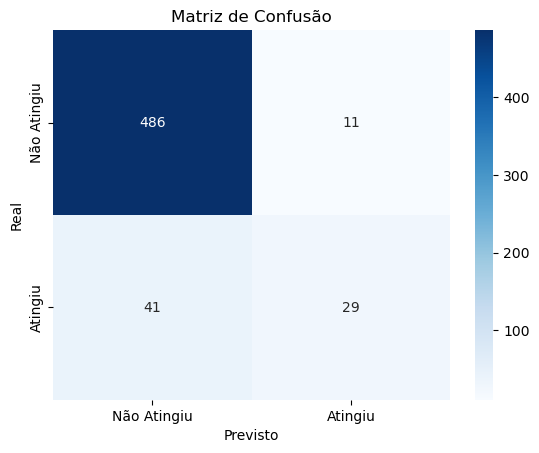

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Atingiu", "Atingiu"], yticklabels=["Não Atingiu", "Atingiu"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [77]:
importances_atingiu_pv = model.feature_importances_
importances_atingiu_pv

array([0.03652122, 0.04933428, 0.0423703 , 0.02902214, 0.24076637,
       0.06023614, 0.08810166, 0.08218814, 0.10415247, 0.07734977,
       0.08321436, 0.01617331, 0.02857046, 0.03865406, 0.011651  ,
       0.01169433])

In [78]:
df_feature_importance_atingiu_pv = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_atingiu_pv
}).sort_values(by='Importance', ascending=False)
df_feature_importance_atingiu_pv

,Feature,Importance
4,INDE,0.240766
8,IDA,0.104152
6,IEG,0.088102
10,Por,0.083214
7,IPS,0.082188
9,Mat,0.077350
5,IAA,0.060236
1,Idade,0.049334
2,Ano ingresso,0.042370
13,Ano,0.038654


/var/folders/_w/n3ywz6nx76d0w8yk7f93g_xm0000gn/T/ipykernel_39996/2342995913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_feature_importance_atingiu_pv["Importance"], y=df_feature_importance_atingiu_pv["Feature"], palette="viridis")


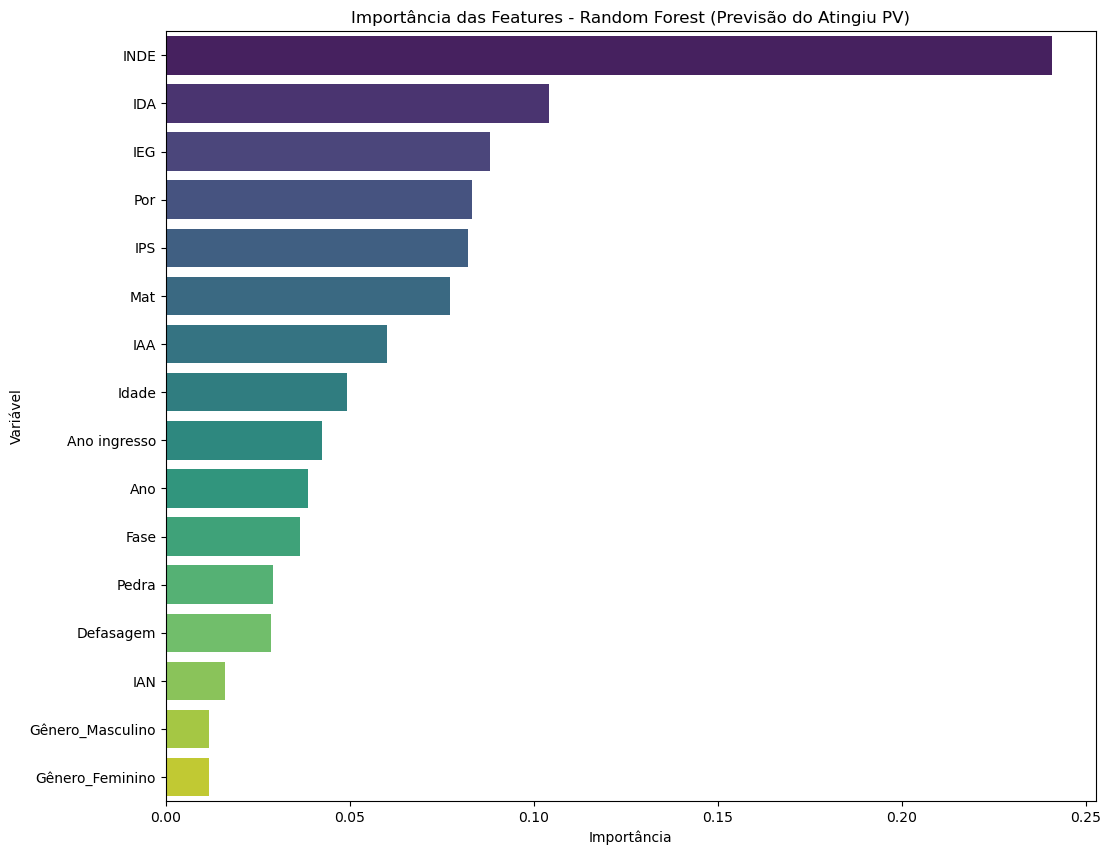

In [79]:
plt.figure(figsize=(12, 10))
sns.barplot(x=df_feature_importance_atingiu_pv["Importance"], y=df_feature_importance_atingiu_pv["Feature"], palette="viridis")
plt.title("Importância das Features - Random Forest (Previsão do Atingiu PV)")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

## 📌 Treinamento com a API Nativa do XGBoost

In [80]:
# Converter os dados para o formato DMatrix do XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [81]:
# Parâmetros do modelo XGBoost
params = {
    "objective": "binary:logistic",  # Classificação binária
    "eval_metric": "logloss",       # Métrica de avaliação
    "max_depth": 6,                 # Profundidade máxima da árvore
    "eta": 0.1,                     # Taxa de aprendizado
    "seed": 42                      # Aleatoriedade
}

In [82]:
# Treinamento do modelo
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100  # Número de iterações (árvores)
)

In [83]:
# Fazer previsões
y_pred_prob = xgb_model.predict(dtest)  # Probabilidades
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]  # Convertendo para classes

In [84]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo XGBoost: {accuracy:.4f}")

Acurácia do modelo XGBoost: 0.9224


In [85]:
print("Relatório de Classificação (XGBoost):")
print(classification_report(y_test, y_pred))

Relatório de Classificação (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       497
           1       0.75      0.56      0.64        70

    accuracy                           0.92       567
   macro avg       0.84      0.77      0.80       567
weighted avg       0.92      0.92      0.92       567



In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[484,  13],
       [ 31,  39]])

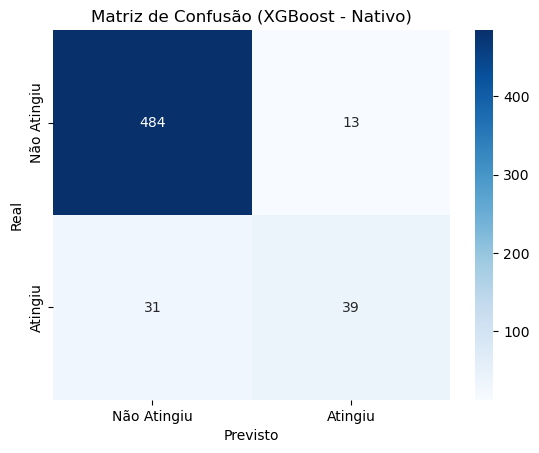

In [87]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Atingiu", "Atingiu"], yticklabels=["Não Atingiu", "Atingiu"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão (XGBoost - Nativo)")
plt.show()

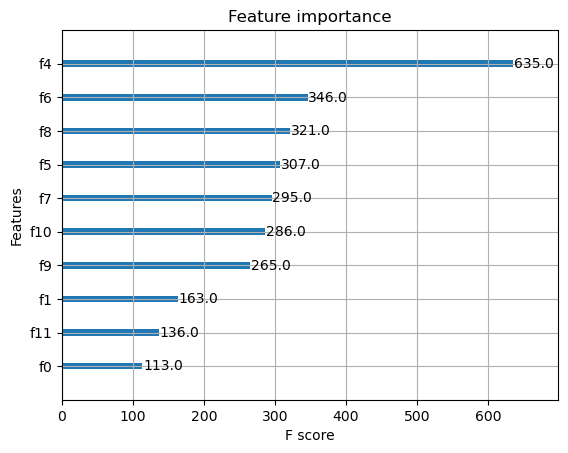

In [88]:
# Calcular a importância das features
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)  # Exemplo mostrando as 10 features mais importantes
plt.show()

In [89]:
feature_names = list(map(lambda x: X.columns[int(x[1:])], xgb_model.get_score(importance_type='weight').keys()))
print(feature_names)

['Fase', 'Idade', 'Ano ingresso', 'Pedra', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'Mat', 'Por', 'IAN', 'Defasagem', 'Ano', 'Gênero_Feminino']
